## Predicción de la popularidad de una canción

En esta tarea, construirá un modelo para predecir la cantidad de reproducciones que tendrá una canción. Nuevamente, usaremos scikit-learn para entrenar y evaluar modelos de regresión y pandas para preprocesar los datos.

En el proceso, encontrará algunos desafíos de modelado y veremos cómo enfrentarlos.

Usaremos un conjunto de datos que poseen con una serie de estadísticas de canciones que fueron previamente calculados sobre el conjunto de datos original.

Estos son:
- plays: el número de veces que se ha reproducido una canción.
- pctmale: porcentaje de reproducciones que provienen de usuarios "male" (masculinos).
- age - edad promedio del oyente.
- country1 - el país de los usuarios que más escucharon esta canción.
- country2 - el país de los usuarios que escucharon esta canción en segundo lugar.
- country3 - el país de los usuarios que escucharon esta canción en tercer lugar.
- pctgt1: porcentaje de reproducciones que provienen de un usuario que ha reproducido la canción más de una vez.
- pctgt2: porcentaje de reproducciones que provienen de un usuario que ha reproducido la canción más de dos veces.
- pctgt5: porcentaje de reproducciones que provienen de un usuario que ha reproducido la canción más de cinco veces.
- clúster: el "número de clúster" del artista asociado con esta canción. Elegimos 25 grupos de manera bastante arbitraria.

### 1. Exploración de datos

**a.** Comenzar cargando los datos: se proporciona un "conjunto de entrenamiento" y un "conjunto de validación" para que pruebe sus modelos. El conjunto de entrenamiento son los ejemplos que usamos para crear nuestros modelos, mientras que el conjunto de validación es un conjunto de datos que "obtenemos" del proceso de ajuste del modelo, usamos estos ejemplos para probar si nuestros modelos predicen con precisión nuevos datos.
- conjunto de entrenamiento: train_model_data.csv´
- conjunto de validación: validation_model_data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# completar el PATH donde se encuentran los datos
PATH = 'data'
train = pd.read_csv(PATH + "/train_model_data.csv")
validation = pd.read_csv(PATH + "/validation_model_data.csv")

Ahora que tiene los datos cargados, explorelos, genere algunas estadísticas descriptivas y tenga una idea de lo que hay en el conjunto de datos. Para las variables categóricas, pruebe con pandas ".count_values()" para tener una idea de las distribuciones más probables (países, etc.).

**b**. En la siguiente celda, coloque algunos comandos que ejecutó para tener una idea de los datos.

In [2]:
# TODO: comandos para la exploración de datos aquí
print (train.dtypes)
print (train.shape) 
print (train.describe()) 
print (train.corr().round(2)) 

artid           object
key             object
plays            int64
pctmale        float64
age            float64
country1        object
country2        object
country3        object
pctgt1         float64
pctgt2         float64
pctgt5         float64
account_age    float64
cluster          int64
dtype: object
(108537, 13)
               plays        pctmale           age         pctgt1  \
count  108537.000000  108537.000000  96455.000000  108537.000000   
mean       97.703152       0.572193     25.719383       0.645258   
std       147.023637       0.301995      4.861965       0.197362   
min        26.000000       0.000000      3.000000       0.058824   
25%        35.000000       0.350000     22.666667       0.500000   
50%        53.000000       0.595062     25.000000       0.620690   
75%        98.000000       0.830000     28.000000       0.750000   
max      5438.000000       1.000000    103.000000       1.000000   

              pctgt2         pctgt5    account_age        clu

**c**. A continuación, cree un diagrama de dispersión por parejas, _pairwise scatter plot_, de las siguientes columnas: plays, pctmale, age, pctgt1, pctgt2, pctgt5. (_Pista: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html_)

¿Notas algo sobre los datos en esta vista? ¿Qué pasa con la relación entre obras de teatro y otras columnas?

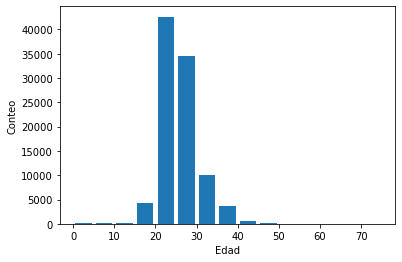

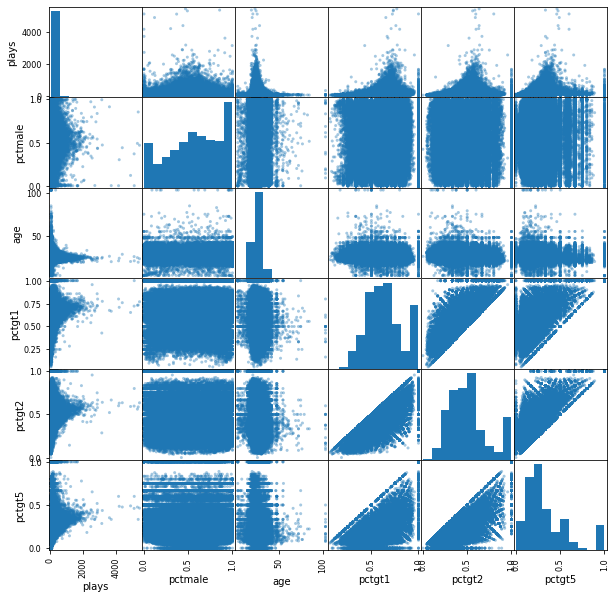

In [3]:
# TODO: comandos para generar un scatter plot aquí.

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
n, bins, tamanio = plt.hist(train["age"], bins, histtype='bar', rwidth=0.8)
plt.xlabel("Edad")
plt.ylabel("Conteo")

matriz_datos = train[list(['plays', 'pctmale', 'age', 'pctgt1', 'pctgt2', 'pctgt5'])]
ejes = pd.plotting.scatter_matrix(matriz_datos, alpha=0.4, figsize=(10, 10))
plt.show()


> TODO: ¿Qué notas sobre los datos en esta vista? Escribe tu respuesta aquí.
Fig1 = Que la mayoria de los oyentes tienen entre 20 y 30 anhos
Figuras = Vemos que normalmente la cantidad de veces reproducidas de canciones esta distribuida entre hombres y mujeres,
tambien vemos con respecto a la edad y las reproducciones son que las personas menores de 30 son las que mas reproducen hasta 5 veces.

### 2. Preparación de datos e introducción a la regresión lineal

*scikit-learn* hace varias cosas muy bien, pero una de las cosas que no maneja con facilidad es la falta de datos categóricos. Los datos categóricos son datos que pueden tomar un conjunto finito de valores, por ejemplo, una variable categórica puede ser el color de un semáforo (Rojo, Amarillo, Verde), esto contrasta con variables continuas como números reales en el rango -Infinito a +Infinito. 

**c**. En esta parte del ejercicio, eliminemos las variables categóricas y *imputemos* los valores faltantes con pandas. Escriba una función para eliminar todas las variables categóricas del conjunto de datos y retornar dos DataFrames de pandas:

1. Un DataFrame con todos los elementos categóricos y la columna de respuesta especificada por el usuario eliminada.
2. Un DataFrame que contiene solo la columna de respuesta.

In [8]:
def basic_prep(datos, col):
    #TODO: ¡haga una copia del conjunto de datos original pero con las variables categóricas eliminadas! 
    #*Cluster* debe considerarse como una variable categórica y debe eliminarse! Utilice la función ".drop" de pandas.
    delete_cat = datos._get_numeric_data()
    delete_cat = delete_cat.drop('cluster', axis=1)
    delete_cat = delete_cat.drop(col, axis=1)
    resp_column = datos[list([col])]
    
    #TODO - imputa los valores faltantes con el promedio de esas columnas, usa la función pandas ".fillna" para lograr esto.  
    mean1 = delete_cat.mean()
    delete_cat = delete_cat.fillna(mean1)
    mean2 = resp_column.mean()
    resp_column = resp_column.fillna(mean2)
    
    return resp_column, delete_cat

#Esto creará dos nuevos data frames, uno que contiene datos de entrenamiento; en este caso, todas las columnas numéricas,
#y uno que contiene datos de respuesta, en este caso, la columna "plays".
train_basic_features, train_basic_response = basic_prep(train, 'plays')
validation_basic_features, validation_basic_response = basic_prep(validation, 'plays')

**d.** Ajuste a un modelo `LinearRegression` con scikit-learn y devuelva la puntuación del modelo tanto en los datos de entrenamiento como en los datos de validación.

In [22]:
from sklearn import linear_model

def fit_model(X, y):
    #TODO - Escriba una función que ajuste un modelo lineal a un conjunto de datos dada una columna de valores para predecir.
    modelo = linear_model.LinearRegression()
    modelo.fit(X, y)
    return modelo

def score_model(model, X, y, Xv, yv):
    #TODO - Escriba una función que retorne los puntajes (scores) del modelo 
    return tuple([model.score(X, y), model.score(Xv, yv)])

def fit_model_and_score(data, response, validation, val_response):
    #TODO - Dado un conjunto de datos de entrenamiento, un conjunto de datos de validación y el nombre de una columna para predecir, 
    #Usar el método ".score()", para retornar el puntaje del modelo sobre los datos de entrenamiento *y* validación
    model = fit_model(data, response)
    return score_model(model, data, response, validation, val_response)

    #END TODO

print (fit_model_and_score(train_basic_features, train_basic_response, validation_basic_features, validation_basic_response))

model = fit_model(train_basic_features, train_basic_response)

(0.0014758245441071443, -0.2406778725742852)


**e.** Interprete los resultados obtenidos

> TODO: ¿Qué ocurrió? ¿Qué muestra el modelo? Escribe tu respuesta aquí.

Ocurre de que la variable que modelamos no tiene una relacion lineal con respecto a las entradas que le estamos dando y
pasa que nosotros modelamos solo para respuestas lineales en base a nuestras entradas de la variable plays.
Por eso es que encontramos estos valores en los puntajes.